# Matrix Factorization
- $A = P Q$

In [1]:
using Random
using Zygote
using Plots
using SparseArrays

In [12]:
function _cost(P, Q, A)
    M_vec, N_vec, A_vec = A
    L = length(A_vec)
    J = 0.0
    for l in 1:L
        m, n, a = M_vec[l], N_vec[l], A_vec[l]
        J += (a - P[m,:]' * Q[:,n])^2
    end
    J / L    
end

_cost (generic function with 1 method)

In [13]:
dcost_P(P,Q,A) = gradient(x -> cost(x,Q,A), P)[1]
dcost_Q(P,Q,A) = gradient(x -> cost(P,x,A), Q)[1]

dcost_Q (generic function with 1 method)

In [14]:
function update(P, Q, A, N_epoch=100, μ=0.1)
    J_a = zeros(Float32, N_epoch)
    J = cost(P, Q, A)
    for i in 1:N_epoch
        dP = dcost_P(P,Q,A)
        P -= μ * dP
        dQ = dcost_Q(P,Q,A)
        Q -= μ * dQ
        J = cost(P,Q,A)
        J_a[i] = J
    end
    P, Q, J_a
end

update (generic function with 3 methods)

In [15]:
function train(A_sp, D_featrues, N_epoch=100, μ=0.1)
    M_vec, N_vec, A_vec = findnz(A_sp)
    M, N = size(A_sp)
    A = (M_vec, N_vec, A_vec)
    
    τ = 0.01
    P = rand(Float32, M, D_featrues) * τ
    Q = rand(Float32, D_featrues, N) * τ    
    
    update(P, Q, A, N_epoch, μ)
end

train (generic function with 3 methods)

In [16]:
function prepare_data(M=4,N=4,L=10)
    sparse(rand(1:M,L), rand(1:N,L), rand(Float32,L), M, N)
end

prepare_data (generic function with 4 methods)

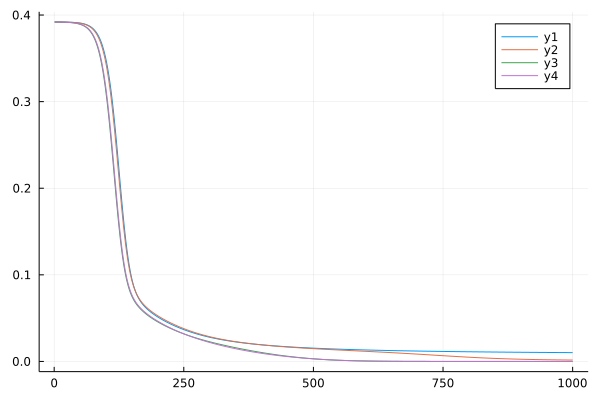

Last cost: J=0.010160076
Last cost: J=0.0015834343
Last cost: J=3.852797e-8
Last cost: J=3.817246e-8


In [17]:
function main(N_epoch=1000)
    A_sp = prepare_data(4,4,10)
        
    function run(D_feature;plot=plot!)
        P, Q, J_a = train(A_sp, D_feature, N_epoch)
        println("Last cost: J=$(J_a[end])")    
        plot(1:N_epoch, J_a)
    end
        
    run(1;plot=plot)
    run(2)    
    run(3)
    f = run(4)
    display(f)    
end

main(1000)

In [18]:
function test(A, D_feature=2, N_epoch = 1000)
    P, Q, J_a = train(A, D_feature, N_epoch)
    J_a[end]
end

test (generic function with 3 methods)

In [19]:
A = prepare_data(4,4,10)
@time test(A, 2, 1000)
@time test(A, 2, 10000)

  0.099053 seconds (932.94 k allocations: 37.928 MiB, 15.97% compilation time)
  0.906630 seconds (9.23 M allocations: 373.873 MiB, 10.69% gc time)


5.3273528f-11